## Customer Churn Prediction Using Artificial Neural Network (ANN)
 - Customer churn prediction is used to measure why customers are leaving a business.
 - We will build a deep learning model to predict the churn and use precision,recall, f1-score to measure performance of our model

- Let's start by importing the necessary libraries

In [3]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

- Now, let's load the data

In [4]:
data = pd.read_csv('customer-churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Cleaning
- Let's do some data cleaning.
- We should drop the 'customerID' column as it's of no use

In [5]:
data.drop('customerID', axis='columns', inplace=True)

- Let's have a look at the shape of our data

In [6]:
data.shape

(7043, 20)

- Our data contains 7043 rows and 20 columns(features)
- Next, let's have a look at the information of the data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


- As you can see from the above data information most of our columns are of object type and we should cjange them to numerical type as our machine learning model accepts number so that it can predict
- We will start by converting the total charges column to a numerical type

In [8]:
# convert 'TotalCharges' column to nnumerical type
pd.to_numeric(data['TotalCharges'])

ValueError: Unable to parse string " " at position 488

- The above error is trying to tell as that some values in the 'TotalCharges' column contain an empty string that can't be changed to a numeric type
- Let's see the rows with empty string values so that we can decide what to do next

In [9]:
empty_string = data[pd.to_numeric(data['TotalCharges'], errors='coerce').isnull()]
empty_string

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


- let's see the number of rows with an empty string for the 'ToalCharges' column

In [10]:
print('empty_ string for the TotalCharges column are: ', empty_string.shape[0])

empty_ string for the TotalCharges column are:  11


- we've got 11 rows out of 7043 with an empty string for the 'TotalCharges' column
- We can drop those values as they are small compared to our total amount of rows which is 7043. We can also use other techniques like mean, median or mode imputation. But, for now let's drop the 11 rows

In [11]:
# filter the data that doen't contain an empty string for the 'TotalCharges' column
data = data[data['TotalCharges'] != ' ']
data.shape

(7032, 20)

- We have dropped the 11 columns and we're left with 7032 columns.
- Now, we can change the values in the 'TotalCharges' column to a numerical value

In [12]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

<ipython-input-12-bfe10864391b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])


- Let's check the data type for the 'TotalCharges' column

In [13]:
data['TotalCharges'].dtypes

dtype('float64')

- The 'ToalCharges' column is now a float
- Next task:
  - Many of the columns are yes, no etc. Let's print unique values in object columns to see data values

In [14]:
def print_unique_col_values(df):
  for column in df:
    if df[column].dtypes == 'object':
      print(f'{column}: {df[column].unique()}')

In [15]:
print_unique_col_values(data)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


- Some of the columns have no internet service or no phone service, that can be replaced with a simple No

In [16]:
data = data.replace('No internet service', 'No')
data = data.replace('No phone service', 'No')

- let's now print the unique values in each column

In [17]:
print_unique_col_values(data)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


- Let's now convert columns with 'Yes or No' values to 1 or 0

In [18]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
  data[col] = data[col].map({'Yes': 1, 'No': 0})

- Let's now see the unique values in each column

In [19]:
for col in data:
  print(f'{col}: {data[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


- Now, let's map the gender column to 1 and 0

In [20]:
data['gender'] = data['gender'].map({'Female': 1, 'Male': 0})
data['gender'].unique()

array([1, 0])

### One Hot encoding for the remaining categorical variables
- Let's chenge the remaining categorical variables using pandas one hot encoding method

In [21]:
data1 = pd.get_dummies(data=data, columns=['InternetService','Contract','PaymentMethod'], dtype=int)
data1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


- Let's now see the data types of each column

In [22]:
data1.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No             

## Data Visualization
- First, let's visulaize 'tenure' vs 'Number of customers'
- Tenure is the length of time a customer remains a customer.

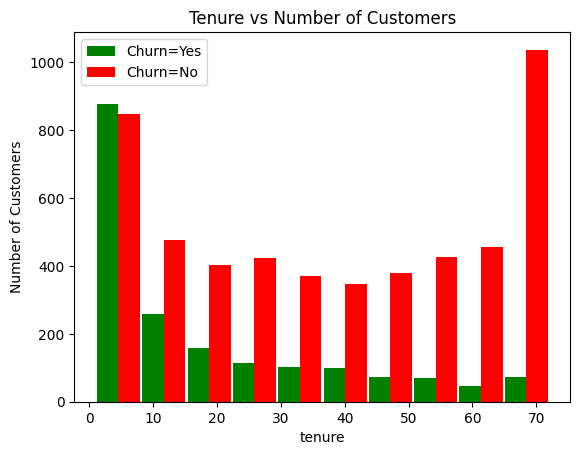

In [23]:
tenure_churn_no = data1[data1['Churn'] == 0]['tenure']
tenure_churn_yes = data1[data1['Churn'] == 1]['tenure']


plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green', 'red'], label=['Churn=Yes','Churn=No'])
plt.xlabel('tenure')
plt.ylabel('Number of Customers')
plt.title('Tenure vs Number of Customers')
plt.legend()

- From the above visulization customers with high tenure have low churn(churn is No) and customers with low tenure have high churn(churn is Yes)

- Now, let's visualize the 'Monthly Charges' vs 'Number of customers'

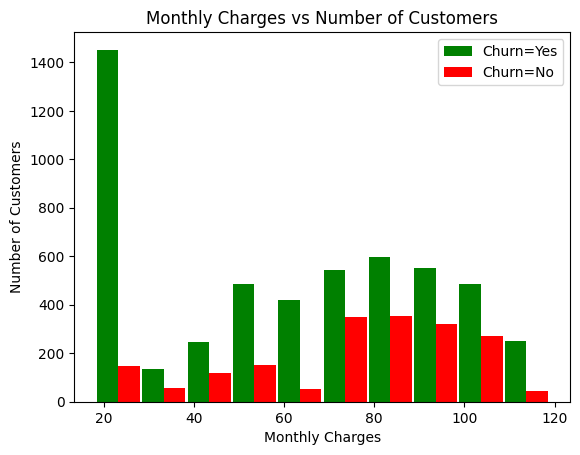

In [24]:
mc_churn_no = data1[data1['Churn'] == 0]['MonthlyCharges']
mc_churn_yes = data1[data1['Churn'] == 1]['MonthlyCharges']

plt.hist([mc_churn_no, mc_churn_yes], rwidth=0.95, color=['green', 'red'], label=['Churn=Yes','Churn=No'])
plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.title('Monthly Charges vs Number of Customers')
plt.legend()


- From the above visualization customers with low monthly charges have low churn(churn No)

## Model Training
- First we need to scale the features we want to train the model on then we will start training the model

In [25]:
### Feature Scaling using MinMaxScaler

cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

data1[cols_to_scale] = scaler.fit_transform(data1[cols_to_scale])

- Now, let's have a look at the data after it has been scaled

In [26]:
for col in data1:
    print(f'{col}: {data1[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

- As you can see from the unique values for each columns displayed above 'tenure','MonthlyCharges','TotalCharges' were scaled.

## Train Test Split

In [27]:
# split the feature and target variable

X = data1.drop('Churn', axis='columns') # because churn is the target variable
y = data1['Churn']

# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

- Let's have a look at the shape for the train and test data

In [28]:
print(X_train.shape)
print(X_test.shape)

(5625, 26)
(1407, 26)


## Building the model using ANN in TensorFlow/Keras

In [42]:
import tensorflow as tf
from tensorflow import keras

# building the layers
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# we will use binary_crossentropy  for the loss it's a binary classification
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 2s 5ms/step - loss: 0.5040 - accuracy: 0.7543
Epoch 2/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4276 - accuracy: 0.7973
Epoch 3/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4185 - accuracy: 0.8046
Epoch 4/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4140 - accuracy: 0.8046
Epoch 5/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4122 - accuracy: 0.8073
Epoch 6/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4102 - accuracy: 0.8105
Epoch 7/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4083 - accuracy: 0.8123
Epoch 8/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4073 - accuracy: 0.8094
Epoch 9/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4054 - accuracy: 0.8100
Epoch 10/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4030 - accura

- Now, let's evaluate our model

In [43]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4969 - accuracy: 0.7655


[0.49685361981391907, 0.7654584050178528]

- Now let's have a look at the prediction

In [44]:
y_pred = model.predict(X_test)
y_pred[:5]

44/44 [==============================] - 0s 2ms/step


array([[0.00255648],
       [0.1019548 ],
       [0.69732594],
       [0.02332637],
       [0.20510557]], dtype=float32)

- We wan't our outpu to be 1 or 0. So we will replace the predicted values based on the following condition
  - if value is greater than 0.5 it will be 1
  - if value is less than 0.5 it will 0
  - Why 0.5? because, we're using the sigmoid function at the output

In [45]:
y_predicted = []
for element in y_pred:
  if element > 0.5:
    y_predicted.append(1)
  else:
    y_predicted.append(0)

- let's have a look at the values of 10 samples

In [46]:
y_predicted[:10]

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

## Confusion Matrix and Classification Report

In [47]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85      1033
           1       0.58      0.45      0.50       374

    accuracy                           0.77      1407
   macro avg       0.70      0.66      0.67      1407
weighted avg       0.75      0.77      0.76      1407



- Now let's visualize the confusion matrix using a heatmap

Text(95.72222222222221, 0.5, 'Truth')

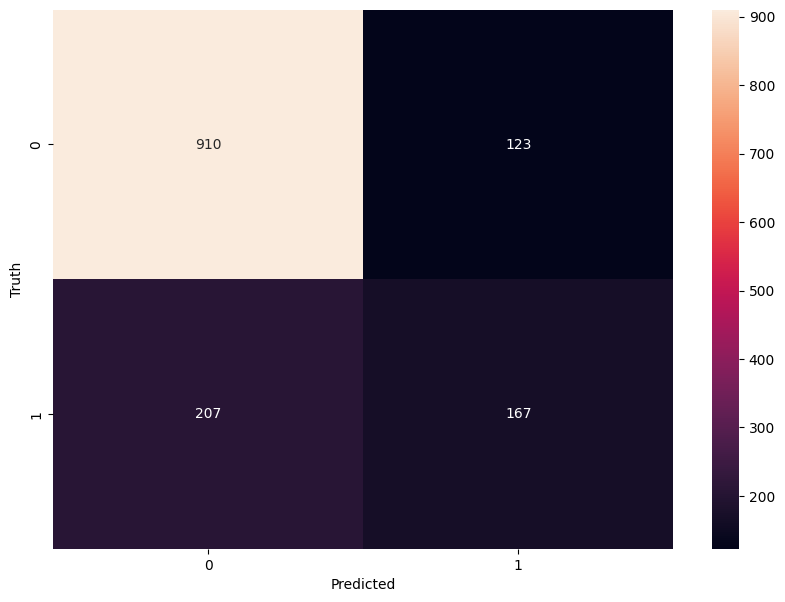

In [48]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

- Let's calculate the metrics using the values from the confusion matrix
- Precision: of all the predicted data what fraction is actually true
- Recall: of all the true data what fraction is actually predicted correctly
- Tip:
  - For precision, think about predictions as your base
  - For recall, think about reality(truth) as your base

### Accuracy

In [49]:
accuracy = (910 + 167) / (910+207+123+167)
round(accuracy, 2)

0.77

### Precision for class '0'
- i.e. Precision for customers who did not churn

In [53]:
precision_0 = 910 / (910 + 207)
round(precision_0, 2)

0.81

### Precision for class '1'
- i.e. Precision for customers who actually churned

In [54]:
precision_1 = 167 / (167 + 123)
round(precision_1, 2)

0.58

### Recall for class '0'

In [57]:
recall_0 = 910 / (910 + 123)
round(recall_0, 2)

0.88

### Recall for class '1'

In [58]:
recall_1 = 167 / (167 + 207)
round(recall_1, 2)

0.45

- As you can see those values for accuracy, precision and recall are the values we got from the Classification Report